In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV,StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,  ConfusionMatrixDisplay, roc_curve, auc
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.ensemble import BaggingClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2024-06-02 00:29:51.444382: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-02 00:29:52.547457: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Data Preprocessing

In [4]:
#Data Preprocessing
data = pd.read_csv('TravelInsurancePrediction.csv')
#Here we read the data


data.dtypes
data.isnull().sum()
#There are no nulls in the data


#Converting categorical variables to numerical variables
data["GraduateOrNot"]= data["GraduateOrNot"].map({"No" :0, "Yes" : 1})
data["FrequentFlyer"]= data["FrequentFlyer"].map({"No" :0, "Yes" : 1})
data["EverTravelledAbroad"]= data["EverTravelledAbroad"].map({"No" :0, "Yes" : 1})
data["Employment Type"]= data["Employment Type"].map({"Government Sector" :0, "Private Sector/Self Employed" : 1})

#Unnamed column dropped from dataset
data = data.drop(columns=['Unnamed: 0'])

# Split the training and testing data (70:30 )
training_points = data.drop(columns=['TravelInsurance'])
training_labels = data['TravelInsurance']

#Random state is to ensure the reproducibility of the results
X_train, X_test, y_train, y_test = train_test_split(
	training_points, 
	training_labels, 
	test_size = 0.3, 
	random_state = 42)

#Normalization of Features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a DataFrame for the counts
data_counts = {
    'Category': ['No', 'Yes'],
    'Training Data': [no_count_train, yes_count_train],
    'Testing Data': [no_count_test, yes_count_test]
}

# Convert to DataFrame
df_counts = pd.DataFrame(data_counts)

# Set the style
sns.set(style="whitegrid")

# Create the plots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Training data plot
sns.barplot(x='Category', y='Training Data', data=df_counts, ax=axes[0], palette='viridis')
axes[0].set_title('Number of Yes and No instances in the Training Data', fontsize=16)
axes[0].set_xlabel('Travel Insurance', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)

# Testing data plot
sns.barplot(x='Category', y='Testing Data', data=df_counts, ax=axes[1], palette='viridis')
axes[1].set_title('Number of Yes and No instances in the Testing Data', fontsize=16)
axes[1].set_xlabel('Travel Insurance', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

NameError: name 'no_count_train' is not defined

As we can see the data is imbalanced, there are much more instances with no travel insurance then travel insurance. We tried to rebalance the data but results were not that good, hence we kept the data set. Hence we can assume already that the models will learn better on instances with no travel insurance, we will notice this in the results for rach of the different models. 

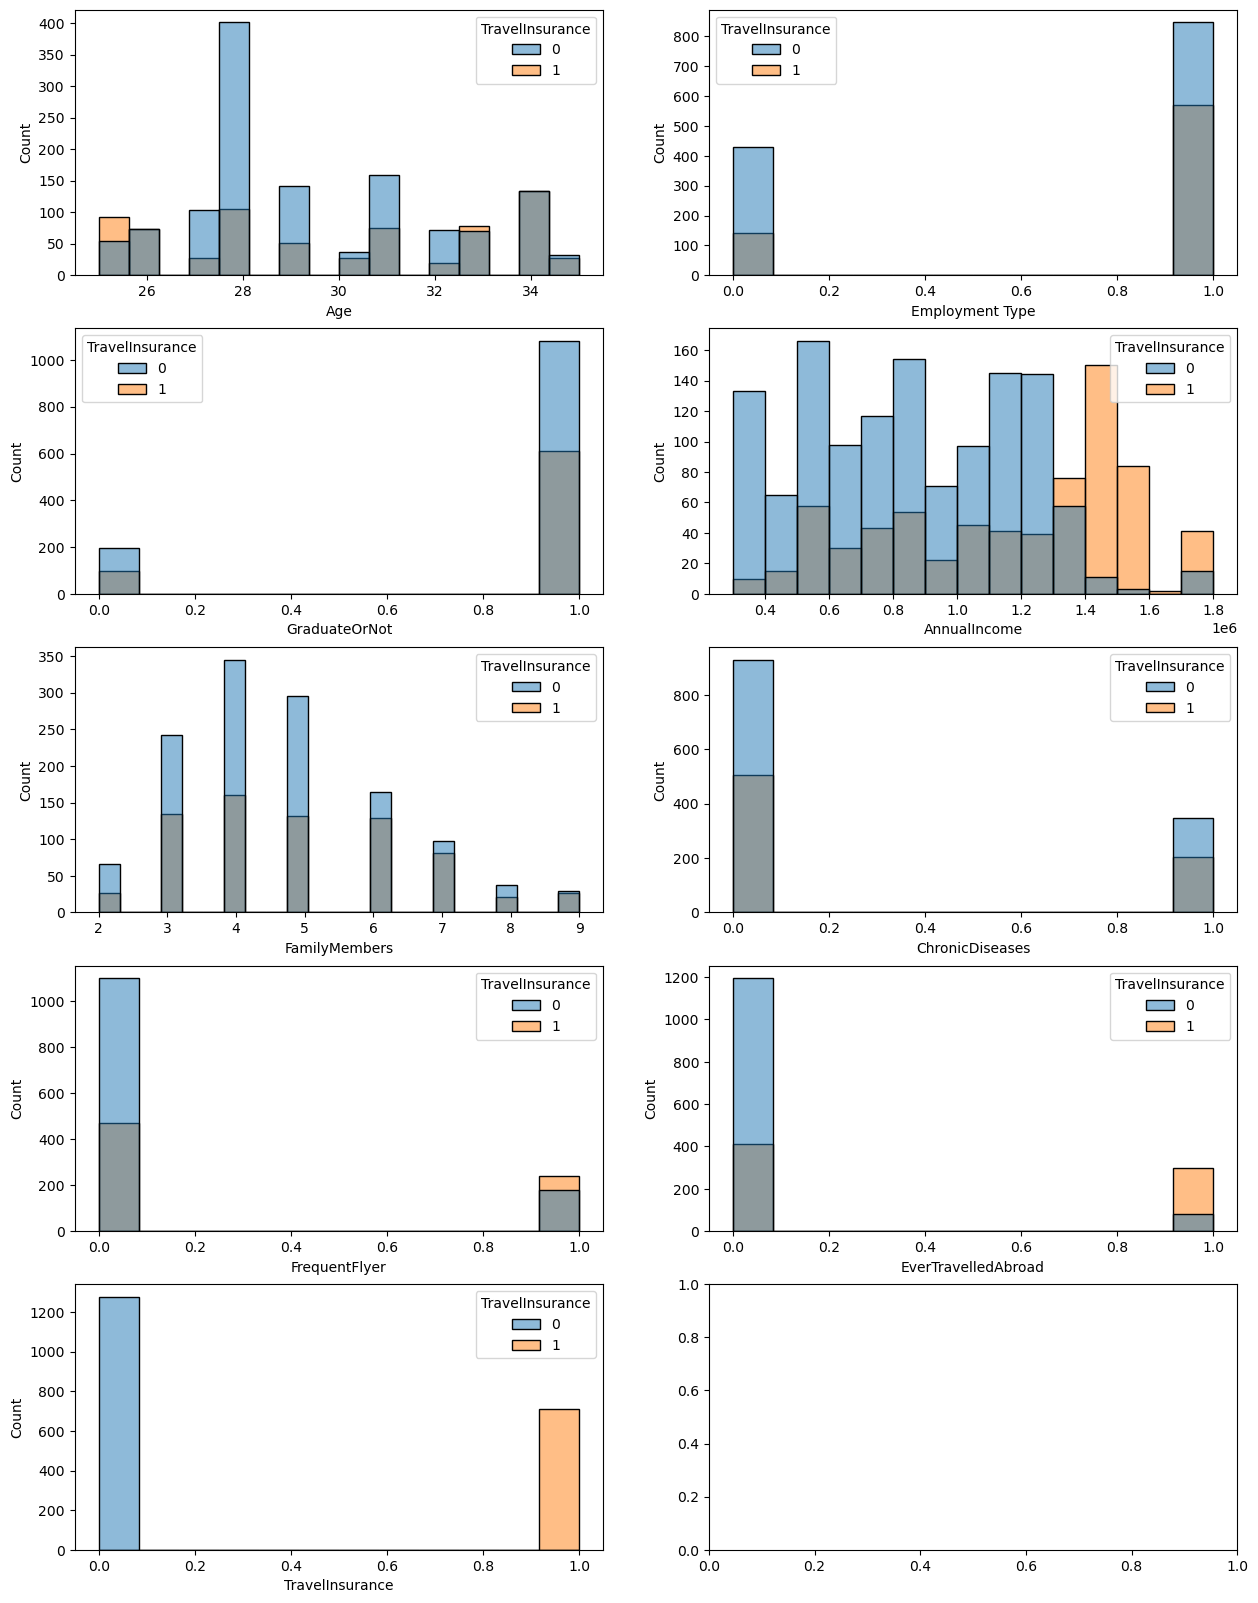

In [5]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15,20))
axs=axs.flat
for i in range (len(data.columns)):
    sns.histplot(data=data, x=data.columns[i],ax=axs[i],hue="TravelInsurance")
plt.show() 

### Correlation Matrix

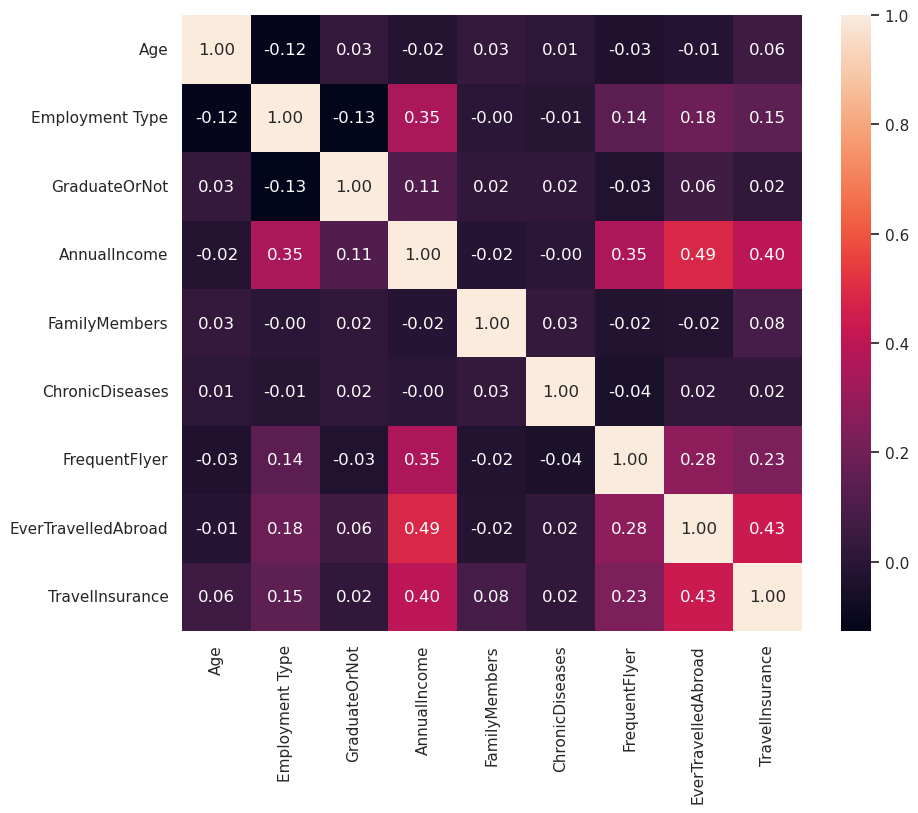

In [101]:
#Correlation matrix this shows how each variable is correlated with one another. 
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

# KNN Model

Distance Metric: euclidean
Accuracy: 0.7805695142378559
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       375
           1       0.82      0.52      0.64       222

    accuracy                           0.78       597
   macro avg       0.80      0.73      0.74       597
weighted avg       0.79      0.78      0.77       597



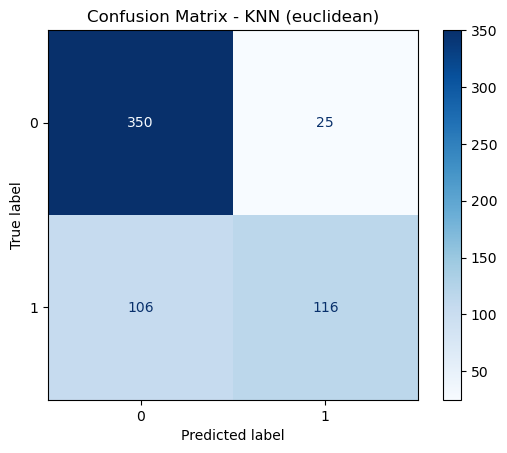

Distance Metric: manhattan
Accuracy: 0.7705192629815746
              precision    recall  f1-score   support

           0       0.76      0.93      0.84       375
           1       0.80      0.51      0.62       222

    accuracy                           0.77       597
   macro avg       0.78      0.72      0.73       597
weighted avg       0.78      0.77      0.76       597



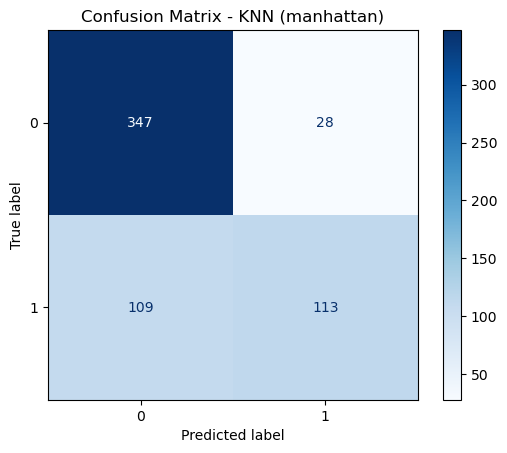

Distance Metric: chebyshev
Accuracy: 0.7470686767169179
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       375
           1       0.74      0.49      0.59       222

    accuracy                           0.75       597
   macro avg       0.75      0.69      0.70       597
weighted avg       0.75      0.75      0.73       597



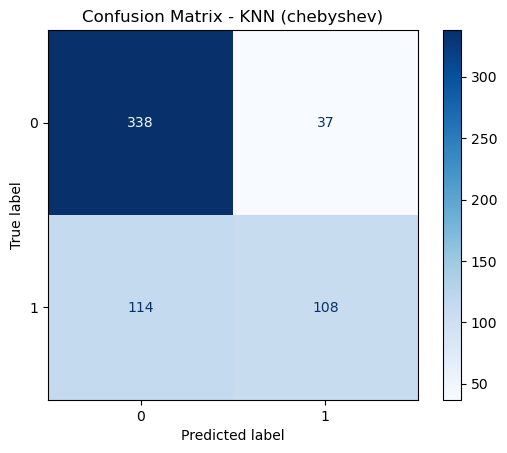

Accuracy results for different distance metrics:
euclidean: 0.7805695142378559
manhattan: 0.7705192629815746
chebyshev: 0.7470686767169179


In [8]:
# Dictionary to store accuracy results for different distance metrics
accuracy_results = {}

# Different distance metrics to try
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']

for metric in distance_metrics:
    # Train the KNN model
    knn = KNeighborsClassifier(n_neighbors=15, metric=metric)
    knn.fit(X_train, y_train)
    
    # Make predictions
    y_pred = knn.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[metric] = accuracy
    
    # Print the accuracy and classification report
    print(f"Distance Metric: {metric}")
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - KNN ({metric})')
    plt.show()

# Print accuracy results for comparison
print("Accuracy results for different distance metrics:")
for metric, acc in accuracy_results.items():
    print(f"{metric}: {acc}")

### KNN Parameter Tuning

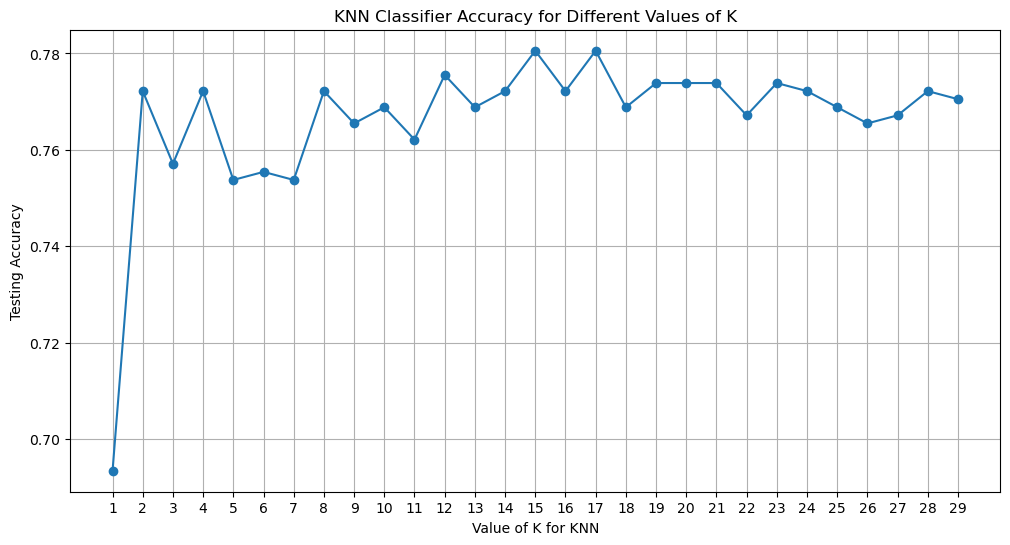

In [6]:
k_range = range(1, 30)
accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))

# Plot the value of k versus the cross-validated accuracy
plt.figure(figsize=(12, 6))
plt.plot(k_range, accuracy_scores, marker='o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.title('KNN Classifier Accuracy for Different Values of K')
plt.xticks(k_range)  # This ensures each number on the x-axis is displayed
plt.grid(True)
plt.show()
#Hence we see that the optimal value of k is 15.

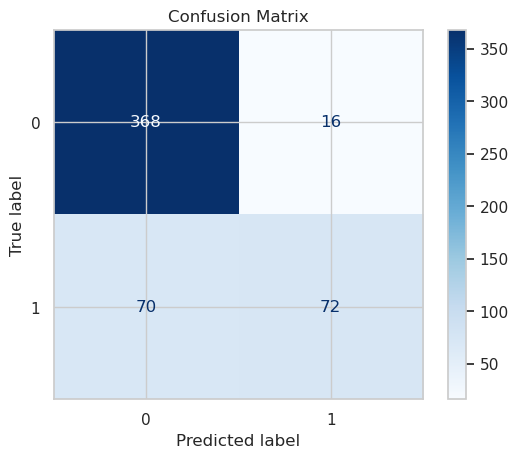

In [105]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Logistic Regression 

In [19]:
#We perform simple Logistic Regression
classifier = LogisticRegression(random_state=4)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.7487437185929648


              precision    recall  f1-score   support

           0       0.78      0.91      0.84       375
           1       0.79      0.57      0.66       222

    accuracy                           0.78       597
   macro avg       0.78      0.74      0.75       597
weighted avg       0.78      0.78      0.77       597



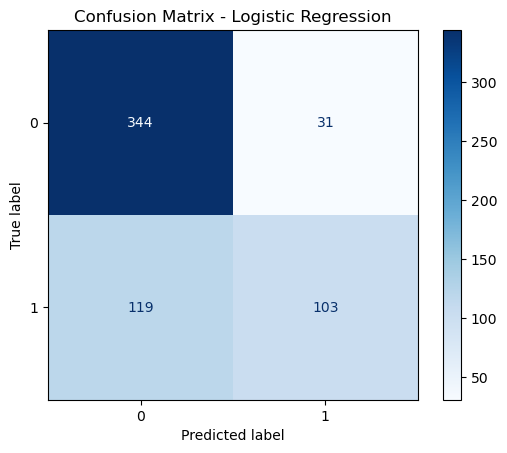

In [16]:
# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)

print(classification_report(y_test, y_pred))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Neural Networks (Deep Learning)

In [21]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the Neural Network
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.3, verbose=1, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')
# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Epoch 1/100


/users/eleves-a/2022/karel.moryoussef/.local/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5784 - loss: 0.6653 - val_accuracy: 0.7488 - val_loss: 0.5788
Epoch 2/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - accuracy: 0.7764 - loss: 0.5676 - val_accuracy: 0.7751 - val_loss: 0.5185
Epoch 3/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - accuracy: 0.7728 - loss: 0.5298 - val_accuracy: 0.7799 - val_loss: 0.4979
Epoch 4/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - accuracy: 0.7859 - loss: 0.4968 - val_accuracy: 0.7847 - val_loss: 0.4861
Epoch 5/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - accuracy: 0.8148 - loss: 0.4716 - val_accuracy: 0.7967 - val_loss: 0.4734
Epoch 6/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - accuracy: 0.8091 - loss: 0.4731 - val_accuracy: 0.8038 - val_loss: 0.4675
Epoch 7/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - accuracy: 0.8092 - loss: 0.4573 - val_accuracy: 0.8062 - val_loss: 0.4635
Epoch 8/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - accuracy: 0.8168 - loss: 0.4473 - val_accuracy: 0.8086 -

### Learning Curves for Loss

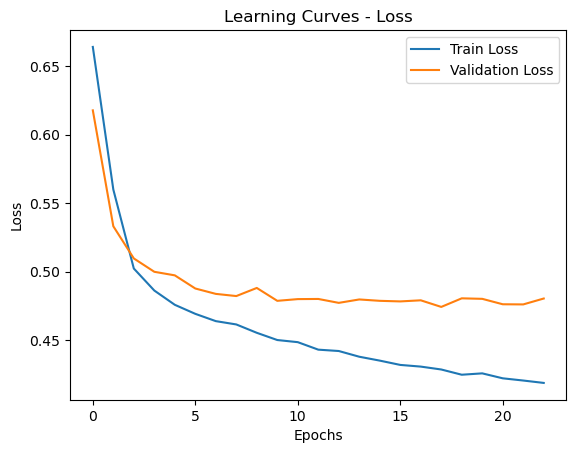

In [11]:
# Plot learning curves for loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curves - Loss')
plt.legend()
plt.show()
#Here we use early stopping and stop when the validation loss starts to come back up. Pretty much it is a test set within our training set. 

### Learning Curves for Accuracy

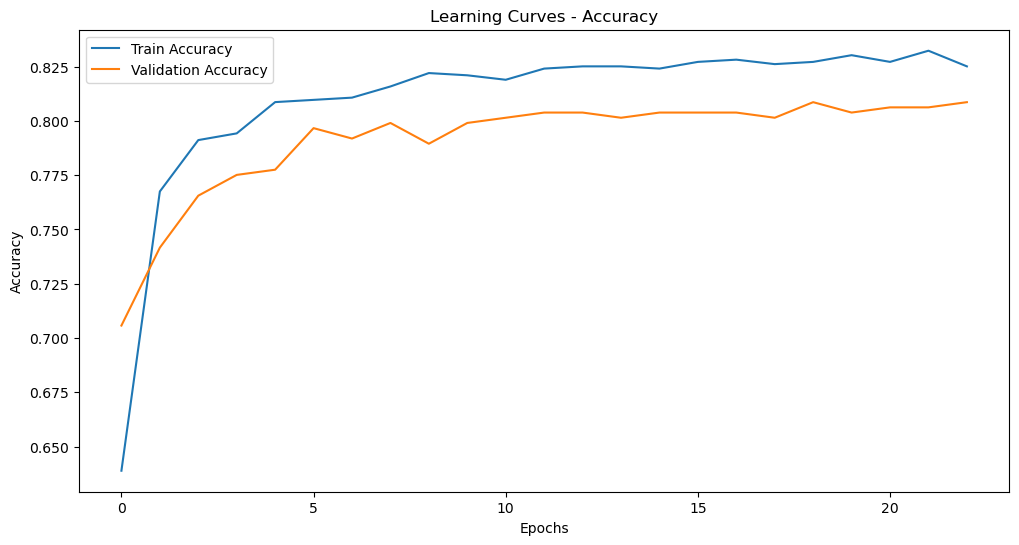

In [20]:
# Plot learning curves for accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Learning Curves - Accuracy')
plt.legend()
plt.show()

#Here we plot the accuracy of the training set and the validation set. It makes sense that the accuracy for the training set is higher since it is pretty much overfitted; The validation accuracy is closer to the reael accuracy. 

### Confusion Matrix

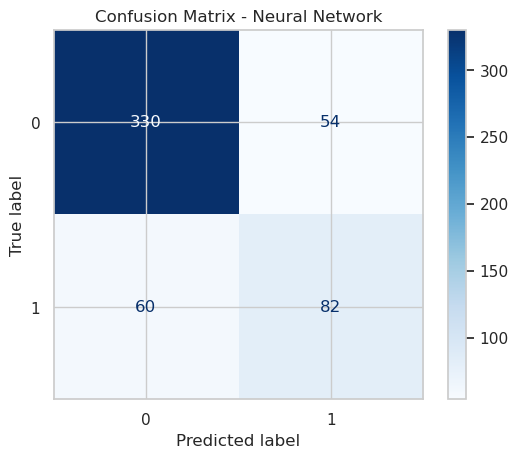

In [113]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Neural Network')
plt.show()

### Paramter Tuning: Batch Size and Early Stopping for Epoch

In [26]:
# Function to build and train the model
def build_and_train_model(X_train, y_train, batch_size):
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    
    history = model.fit(X_train, y_train, epochs=100, batch_size=batch_size, validation_split=0.3, verbose=1, callbacks=[early_stopping])
    
    return model, history

# Define batch sizes and number of runs
batch_sizes = [16, 32, 64, 128]
num_runs = 5 # Number of runs for averaging
all_results = []

for batch_size in batch_sizes:
    accuracies = []
    
    for run in range(num_runs):
        model, history = build_and_train_model(X_train, y_train, batch_size)
        loss, accuracy = model.evaluate(X_test, y_test)
        accuracies.append(accuracy)
    
    all_results.append((batch_size, accuracies))

# Create a DataFrame for easier plotting
df_results = pd.DataFrame(all_results, columns=['Batch Size', 'Accuracies'])

# Plot using seaborn
plt.figure(figsize=(10, 6))

for index, row in df_results.iterrows():
    sns.kdeplot(row['Accuracies'], label=f'Batch Size {row["Batch Size"]}')

plt.xlabel('Test Accuracy')
plt.ylabel('Density')
plt.title('Distribution of Test Accuracy for Different Batch Sizes')
plt.legend()
plt.show()

Epoch 1/100


/users/eleves-a/2022/karel.moryoussef/.local/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6434 - loss: 0.6615 - val_accuracy: 0.7536 - val_loss: 0.5747
Epoch 2/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - accuracy: 0.7621 - loss: 0.5500 - val_accuracy: 0.7584 - val_loss: 0.5191
Epoch 3/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - accuracy: 0.7601 - loss: 0.5193 - val_accuracy: 0.7632 - val_loss: 0.5047
Epoch 4/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - accuracy: 0.7862 - loss: 0.4900 - val_accuracy: 0.7703 - val_loss: 0.4955
Epoch 5/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - accuracy: 0.7882 - loss: 0.5081 - val_accuracy: 0.7703 - val_loss: 0.4884
Epoch 6/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - accuracy: 0.7870 - loss: 0.4891 - val_accuracy: 0.7751 - val_loss: 0.4852
Epoch 7/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - accuracy: 0.8091 - loss: 0.4765 - val_accuracy: 0.7775 - val_loss: 0.4804
Epoch 8/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - accuracy: 0.7891 - loss: 0.4863 - val_accuracy: 0.7823 -

KeyboardInterrupt: 

After running multiple times, the optimization program for batch size above, we can conclude that the optimal batch size is 16 accuracy. We notice the high repeatability of good accuracy with a batch size of 16. In addition this batch size gives the best accuracy.  

### Conclusion

In the end, with neural networks we obtained 80% accuracy which is better than both logistic regression and KNN

# Decision Trees
We begin by first analysing the different features and looking how important different features are. We try and find which features are the most important in predicting the travel insurance label. We do this to compare with decision tree after. 

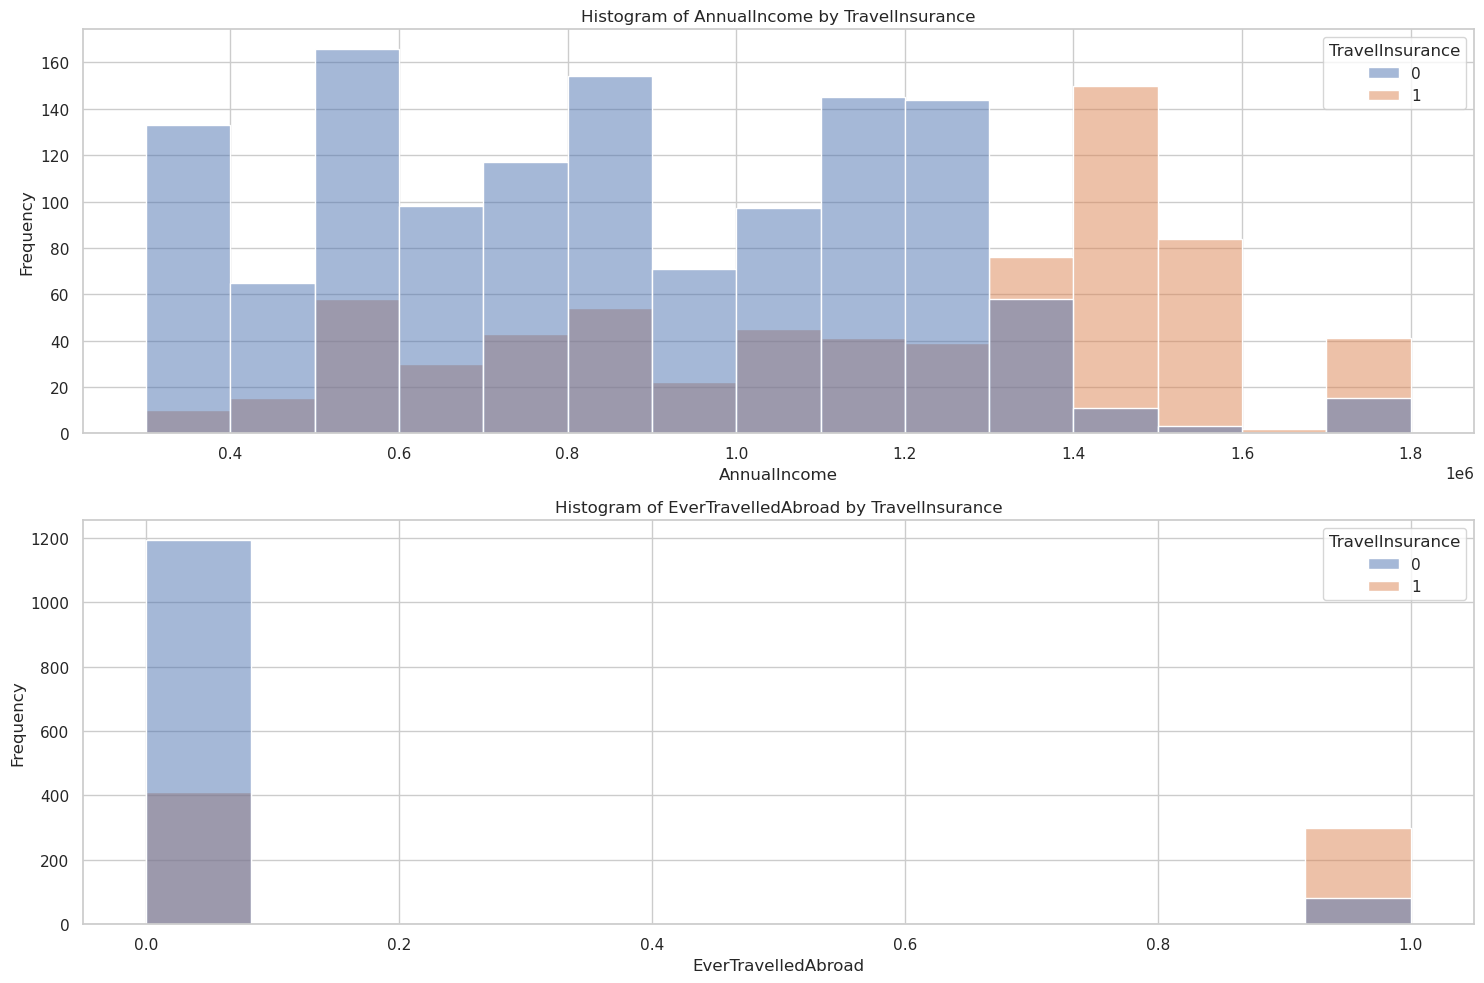

In [114]:
#### Identify features with correlation > 0.3 with 'TravelInsurance'
correlation_matrix = data.corr()
correlated_features = correlation_matrix.index[correlation_matrix['TravelInsurance'] > 0.3].tolist()

# Remove 'TravelInsurance' itself from the list
correlated_features.remove('TravelInsurance')

# Plot histograms for the correlated features
fig, axs = plt.subplots(nrows=len(correlated_features), ncols=1, figsize=(15, 5 * len(correlated_features)))
axs = axs.flat

for i, feature in enumerate(correlated_features):
    sns.histplot(data=data, x=feature, ax=axs[i], hue="TravelInsurance")
    axs[i].set_title(f'Histogram of {feature} by TravelInsurance')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#From the correlation matrix, we have that the correlation coefficient between Annual Income/TravelInsurance and EverTravelledAbraod/TravelInsuranc 
#Are above 0.3. As can see most high people with with high paying jobs have travel insurance while we can see that the amount of people decreases linearly 
#the anual income. 

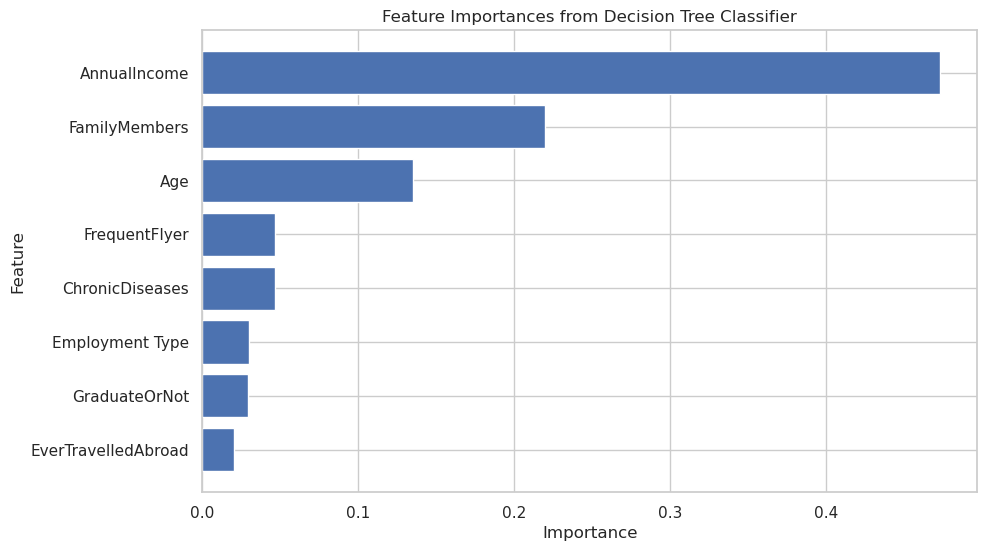

In [115]:
# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42,criterion='entropy')
clf.fit(X_train, y_train)

# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame for easy plotting
feature_names = training_points.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Decision Tree Classifier')
plt.gca().invert_yaxis()
plt.show()

### Explanation to why feature Ever Travelled Abroad is low important feature
The feature importance plot from the Decision Tree classifier is shown below:

From this plot, we observe that "AnnualIncome" is the most important feature, followed by "FamilyMembers" and "Age". Surprisingly, "EverTravelledAbroad" has a very low importance.

Intuitive Expectation:
Intuitively, we might expect "EverTravelledAbroad" to be a significant predictor of whether a person buys travel insurance, as past travel experience could increase the likelihood of purchasing insurance for future trips.

Correlation Analysis:
To understand this discrepancy, we examine the correlation matrix of the features:


We observe that "EverTravelledAbroad" has a high correlation (0.49) with "AnnualIncome". This indicates that people who have traveled abroad tend to have higher incomes.

Explanation:
In decision trees, when two features are highly correlated, the tree tends to use one feature more frequently to make splits. Since "AnnualIncome" is highly correlated with "EverTravelledAbroad" and provides strong splits, the model uses "AnnualIncome" more often, reducing the apparent importance of "EverTravelledAbroad".

### Decision Tree Model 
In this section, we explore the different decision tree models. In the first model, we use the basic decision tree where the tree grows until the leaf nodes are pure and the impurity is 0). Hence we may be overfitting the data, we test for overfitting.

In [116]:
# Evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.7642585551330798
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       384
           1       0.56      0.57      0.57       142

    accuracy                           0.76       526
   macro avg       0.70      0.70      0.70       526
weighted avg       0.77      0.76      0.76       526



In [79]:
# Evaluate the model on the training data
y_pred_train = clf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f'Training Accuracy: {accuracy_train}')
print('Classification Report (Training Data):')
print(classification_report(y_train, y_pred_train))

#As we can see, we get 93% training accuracy. For the test accuracy, we get 77.2%, hence our current model is overfitting the data too well.
#It is learning all the noise in the training data. This is due to the fact that we are expanding our tree until leaf nodes are pure. 

Training Accuracy: 0.9225928256765261
Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1020
           1       0.97      0.81      0.88       569

    accuracy                           0.92      1589
   macro avg       0.94      0.90      0.91      1589
weighted avg       0.93      0.92      0.92      1589



### Improvement of the model with hyper-parameter tuning
We don't use ensemble methods yet. We use grid search to search for the best hyper-parameters. 

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training Accuracy (Best Model): 0.8338577721837633
Classification Report (Training Data, Best Model):
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1020
           1       0.91      0.59      0.72       569

    accuracy                           0.83      1589
   macro avg       0.86      0.78      0.80      1589
weighted avg       0.85      0.83      0.82      1589

Test Accuracy (Best Model): 0.8442211055276382
Classification Report (Test Data, Best Model):
              precision    recall  f1-score   support

           0       0.81      1.00      0.89       257
           1       0.99      0.57      0.72       141

    accuracy                           0.84       398
   macro avg       0.90      0.78      0.81       398
weighted avg     

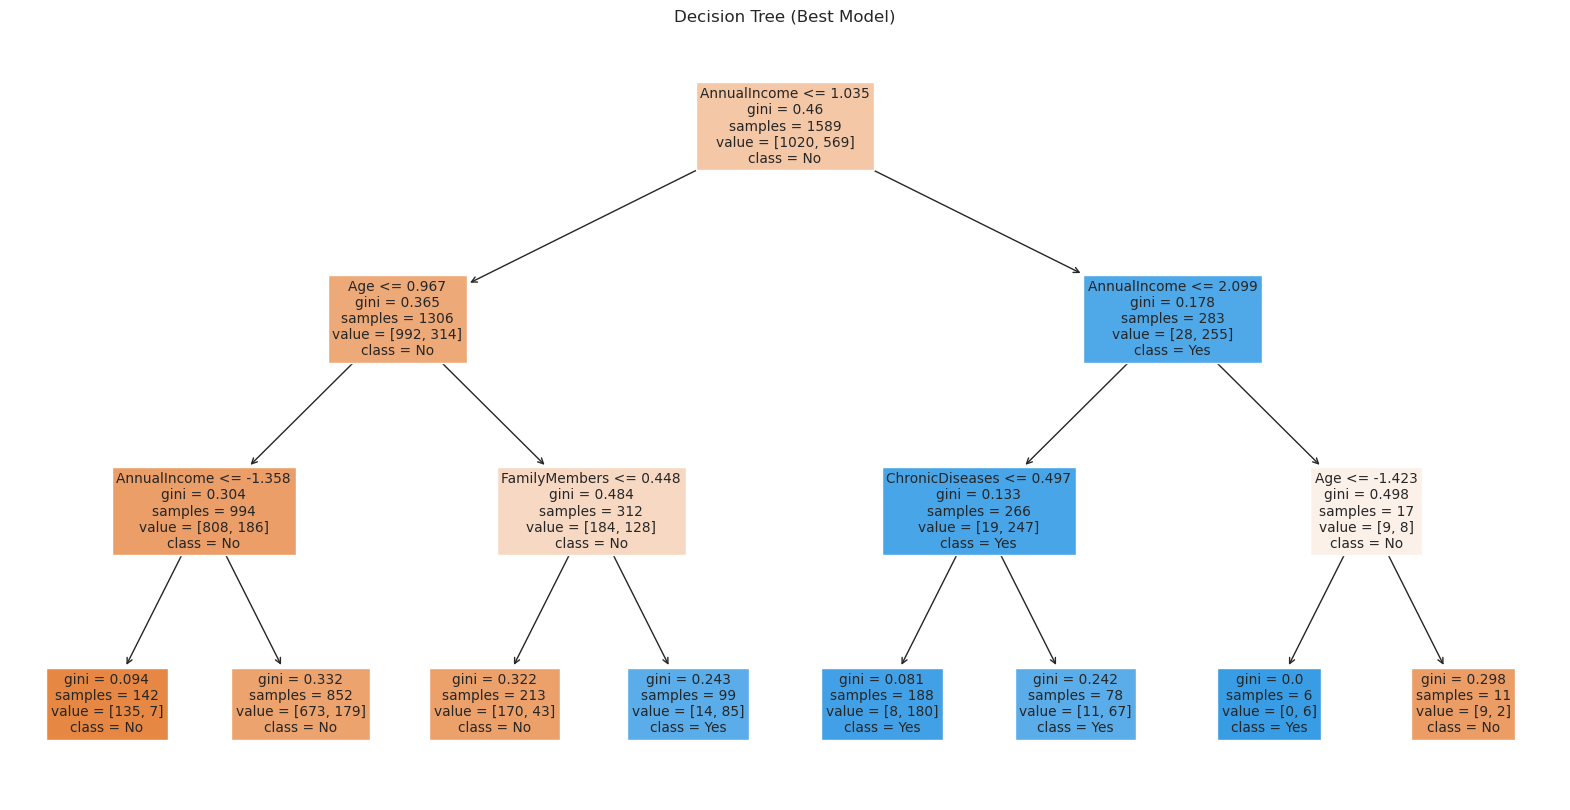

In [80]:
# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1,
                           verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Evaluate the best model on the training data
best_clf = grid_search.best_estimator_
y_pred_train_best = best_clf.predict(X_train)
accuracy_train_best = accuracy_score(y_train, y_pred_train_best)
print(f'Training Accuracy (Best Model): {accuracy_train_best}')
print('Classification Report (Training Data, Best Model):')
print(classification_report(y_train, y_pred_train_best))

# Evaluate the best model on the test data
y_pred_test_best = best_clf.predict(X_test)
accuracy_test_best = accuracy_score(y_test, y_pred_test_best)
print(f'Test Accuracy (Best Model): {accuracy_test_best}')
print('Classification Report (Test Data, Best Model):')
print(classification_report(y_test, y_pred_test_best))

# Plot the best decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_clf, feature_names=training_points.columns, class_names=['No', 'Yes'], filled=True)
plt.title('Decision Tree (Best Model)')
plt.show()

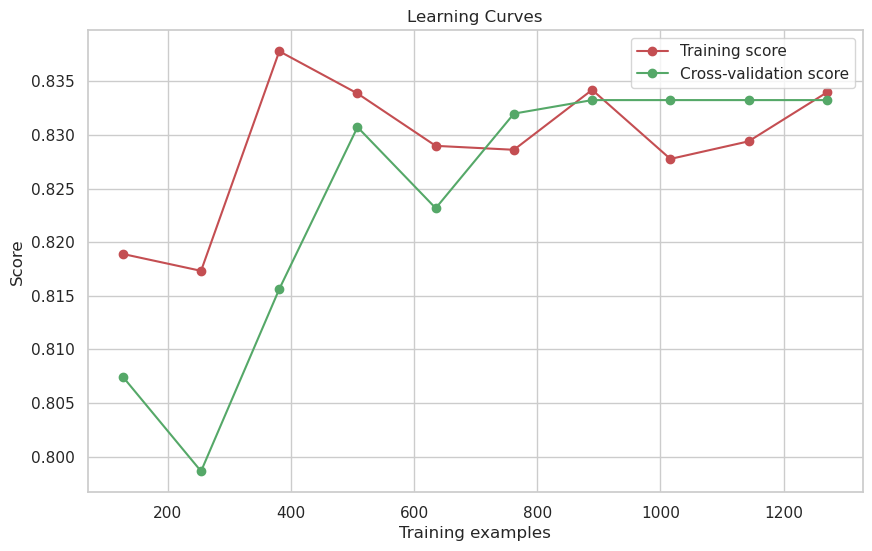

In [81]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_clf, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label="Cross-validation score")
plt.title("Learning Curves")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()


The provided output showcases the performance of a decision tree classifier after hyperparameter tuning using GridSearchCV. The model achieved an overall test accuracy of approximately 83.25%. The detailed classification report indicates high precision (80%) and recall

The provided output showcases the performance of a decision tree classifier after hyperparameter tuning using GridSearchCV. The model achieved an overall test accuracy of approximately 83.25%. The classification report indicates that the model performs well for class 0 (No Insurance), with a precision of 80% and an exceptionally high recall of 98%, leading to an F1-score of 0.88. However, for class 1 (Insurance), while the precision is high at 94%, the recall is significantly lower at 59%, resulting in an F1-score of 0.72. This suggests that the model is better at correctly identifying instances of "No Insurance" but tends to miss a notable proportion of "Insurance" cases. The macro average metrics reflect a balanced performance across both classes, while the weighted average, taking into account the class imbalance, demonstrates a slightly lower performance. 

### Ensemble Methods
We explore two different types of ensemble methods, bagging and boosting. 
These two types of ensemble methods are very different: 
Bagging methods are primarily used to provide stability and reduce the variance of machine learning models rather than significantly improve their accuracy. Bagging works by training multiple instances of a base model on different random subsets of the training data and then averaging their predictions (for regression) or taking a majority vote (for classification). Hence it seems logical that the results of the bagging classifier (even when optimized arent giving significant improvements in accuracy). 

Bagging Models are generally used:  
- **High-Variance Models:** Bagging is especially useful for models that are prone to overfitting, such as decision trees.  
- **Ensemble Learning:** When you need an ensemble of models to reduce the overall prediction error by averaging the predictions of multiple models.  
- **Stability over Accuracy:** When the goal is to achieve consistent and stable performance across different datasets rather than achieving the highest possible accuracy on a specific dataset.

However, we can use boosting which is the second type of ensemble methode. Boosting is a technique primarily used to improve the accuracy of machine learning models. Unlike bagging, which aims to reduce variance, boosting focuses on reducing both bias and variance by combining multiple weak learners to form a strong learner. 



### Bagging Classifier

Bagging Classifier Accuracy: 0.7855946398659966
Classification Report (Bagging Classifier):
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       375
           1       0.75      0.63      0.69       222

    accuracy                           0.79       597
   macro avg       0.78      0.75      0.76       597
weighted avg       0.78      0.79      0.78       597



/usr/local/Anaconda3-2023.07-1/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


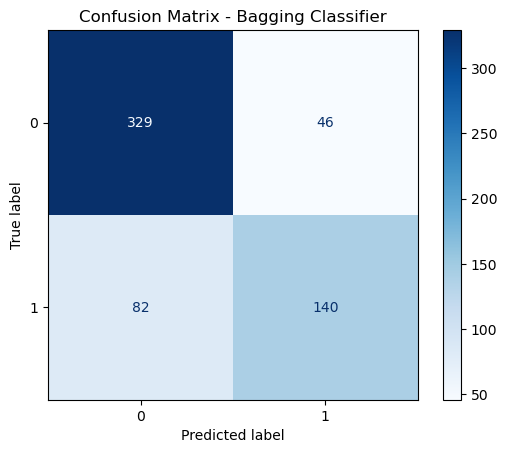

In [33]:
# Initialize the BaggingClassifier
bagging_clf = BaggingClassifier(base_estimator=clf, n_estimators=50, random_state=42)

# Fit the BaggingClassifier on the training data
bagging_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_bagging = bagging_clf.predict(X_test)

# Evaluate the BaggingClassifier
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f'Bagging Classifier Accuracy: {accuracy_bagging}')
print('Classification Report (Bagging Classifier):')
print(classification_report(y_test, y_pred_bagging))

# Confusion Matrix for Bagging Classifier
cm_bagging = confusion_matrix(y_test, y_pred_bagging)
disp_bagging = ConfusionMatrixDisplay(confusion_matrix=cm_bagging, display_labels=[0, 1])
disp_bagging.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Bagging Classifier')
plt.show()


Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/Anaconda3-2023.07-1/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/Anaconda3-2023.07-1/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/Anaconda3-2023.07-1/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/Anaconda3-2023.07-1/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/Anaconda3-2023.07-1/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version

Best Parameters for BaggingClassifier: {'max_features': 0.7, 'max_samples': 0.7, 'n_estimators': 100}
Training Accuracy (Best Bagging Model): 0.8633093525179856
Classification Report (Training Data, Best Bagging Model):
              precision    recall  f1-score   support

           0       0.84      0.98      0.90       902
           1       0.95      0.64      0.77       488

    accuracy                           0.86      1390
   macro avg       0.89      0.81      0.84      1390
weighted avg       0.88      0.86      0.86      1390

Test Accuracy (Best Bagging Model): 0.8174204355108877
Classification Report (Test Data, Best Bagging Model):
              precision    recall  f1-score   support

           0       0.79      0.98      0.87       375
           1       0.93      0.55      0.69       222

    accuracy                           0.82       597
   macro avg       0.86      0.76      0.78       597
weighted avg       0.84      0.82      0.80       597



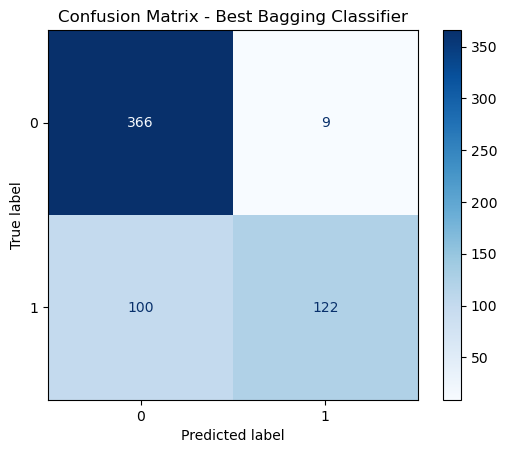

In [34]:
# Define the parameter grid for BaggingClassifier
param_grid_bagging = {
    'n_estimators': [10, 20, 50, 100],  # number of base estimators
    'max_samples': [0.5, 0.7, 1.0],  # proportion of samples to draw for each base estimator
    'max_features': [0.5, 0.7, 1.0]  # proportion of features to draw for each base estimator
}

# Initialize the GridSearchCV for BaggingClassifier
grid_search_bagging = GridSearchCV(estimator=BaggingClassifier(base_estimator=clf, random_state=42),
                                   param_grid=param_grid_bagging,
                                   scoring='accuracy',
                                   cv=5,
                                   n_jobs=-1,
                                   verbose=1)

# Fit the model
grid_search_bagging.fit(X_train, y_train)

# Get the best parameters
best_params_bagging = grid_search_bagging.best_params_
print(f'Best Parameters for BaggingClassifier: {best_params_bagging}')

# Evaluate the best model on the training data
best_bagging_clf = grid_search_bagging.best_estimator_
y_pred_train_best_bagging = best_bagging_clf.predict(X_train)
accuracy_train_best_bagging = accuracy_score(y_train, y_pred_train_best_bagging)
print(f'Training Accuracy (Best Bagging Model): {accuracy_train_best_bagging}')
print('Classification Report (Training Data, Best Bagging Model):')
print(classification_report(y_train, y_pred_train_best_bagging))

# Evaluate the best model on the test data
y_pred_test_best_bagging = best_bagging_clf.predict(X_test)
accuracy_test_best_bagging = accuracy_score(y_test, y_pred_test_best_bagging)
print(f'Test Accuracy (Best Bagging Model): {accuracy_test_best_bagging}')
print('Classification Report (Test Data, Best Bagging Model):')
print(classification_report(y_test, y_pred_test_best_bagging))

# Confusion Matrix for the best Bagging model
cm_best_bagging = confusion_matrix(y_test, y_pred_test_best_bagging)
disp_best_bagging = ConfusionMatrixDisplay(confusion_matrix=cm_best_bagging, display_labels=[0, 1])
disp_best_bagging.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Best Bagging Classifier')
plt.show()

### Gradient Boosting Ensemble Method

Gradient Boosting Classifier Accuracy: 0.830820770519263
Classification Report (Gradient Boosting Classifier):
              precision    recall  f1-score   support

           0       0.80      0.98      0.88       375
           1       0.94      0.58      0.72       222

    accuracy                           0.83       597
   macro avg       0.87      0.78      0.80       597
weighted avg       0.85      0.83      0.82       597



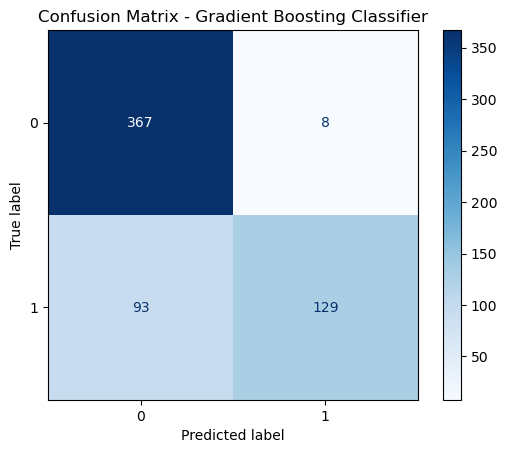

In [35]:
# Initialize the GradientBoostingClassifier
boosting_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the GradientBoostingClassifier on the training data
boosting_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_boosting = boosting_clf.predict(X_test)

# Evaluate the GradientBoostingClassifier
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
print(f'Gradient Boosting Classifier Accuracy: {accuracy_boosting}')
print('Classification Report (Gradient Boosting Classifier):')
print(classification_report(y_test, y_pred_boosting))

# Plot Confusion Matrix for Gradient Boosting Classifier
cm_boosting = confusion_matrix(y_test, y_pred_boosting)
disp_boosting = ConfusionMatrixDisplay(confusion_matrix=cm_boosting, display_labels=[0, 1])
disp_boosting.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Gradient Boosting Classifier')
plt.show()

In [36]:
# Define the parameter grid for GradientBoostingClassifier
param_grid_boosting = {
    'n_estimators': [50, 100, 150],  # number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],  # step size shrinkage
    'max_depth': [3, 5, 7],  # maximum depth of the individual regression estimators
    'min_samples_split': [2, 5, 10],  # minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 5],  # minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2']  # number of features to consider when looking for the best split
}

# Initialize the GridSearchCV for GradientBoostingClassifier
grid_search_boosting = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                                    param_grid=param_grid_boosting,
                                    scoring='accuracy',
                                    cv=5,  # 5-fold cross-validation
                                    n_jobs=-1,
                                    verbose=1)

# Fit the model
grid_search_boosting.fit(X_train, y_train)

# Get the best parameters
best_params_boosting = grid_search_boosting.best_params_
print(f'Best Parameters for Gradient Boosting Classifier: {best_params_boosting}')

# Evaluate the best model on the training data
best_boosting_clf = grid_search_boosting.best_estimator_
y_pred_train_best_boosting = best_boosting_clf.predict(X_train)
accuracy_train_best_boosting = accuracy_score(y_train, y_pred_train_best_boosting)
print(f'Training Accuracy (Best Gradient Boosting Model): {accuracy_train_best_boosting}')
print('Classification Report (Training Data, Best Gradient Boosting Model):')
print(classification_report(y_train, y_pred_train_best_boosting))

# Evaluate the best model on the test data
y_pred_test_best_boosting = best_boosting_clf.predict(X_test)
accuracy_test_best_boosting = accuracy_score(y_test, y_pred_test_best_boosting)
print(f'Test Accuracy (Best Gradient Boosting Model): {accuracy_test_best_boosting}')
print('Classification Report (Test Data, Best Gradient Boosting Model):')
print(classification_report(y_test, y_pred_test_best_boosting))

# Plot Confusion Matrix for the best Gradient Boosting model
cm_best_boosting = confusion_matrix(y_test, y_pred_test_best_boosting)
disp_best_boosting = ConfusionMatrixDisplay(confusion_matrix=cm_best_boosting, display_labels=[0, 1])
disp_best_boosting.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Best Gradient Boosting Classifier')
plt.show()

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


KeyboardInterrupt: 

The gradient boosting classifier provides similar results to the hyperparameter tuned decision tree. However, gradient boosting provides higher robustness, and better generalises better to unseen data. 

In [ ]:
# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predictions
y_pred_train = rf_clf.predict(X_train)
y_pred_test = rf_clf.predict(X_test)

# Evaluation
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f'Random Forest Training Accuracy: {train_accuracy}')
print(f'Random Forest Test Accuracy: {test_accuracy}')

print('Classification Report (Training Data):')
print(classification_report(y_train, y_pred_train))

print('Classification Report (Test Data):')
print(classification_report(y_test, y_pred_test))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()